#### Problem Statement

HELP International has raised around $10 million. The CEO needs to decide how to use this money strategically and effectively. You have been provided with a dataset named **`"country_data.csv"`**, which includes various features. The dataset comprises the following columns:

  - `country`: Name of the country.
  - `child_mort`: Child mortality rate, the number of deaths of children under 5 years of age per 1000 live births.
  - `exports`: Exports of goods and services as a percentage of the country's GDP.
  - `health`: Health expenditure as a percentage of the country's GDP.
  - `imports`: Imports of goods and services as a percentage of the country's GDP.
  - `income`: Net income per person in USD.
  - `inflation`: The rate at which the general level of prices for goods and services is rising, and subsequently, purchasing power is falling(%).
  - `life_expec`: Life expectancy at birth, indicating the number of years a newborn is expected to live.
  - `total_fer`: Total fertility rate, the average number of children that would be born to a woman over her lifetime.
  - `gdpp`: GDP per capita in USD, representing the average economic output per person.

As a data scientist / AI engineer, your task is to use this dataset to categorize / cluster the countries using socio-economic and health factors that determine the overall development of the country.

In [2]:
# **Dataset Credits**: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data 

# # Released under MIT License

# #Copyright (c) 2013 Mark Otto.

# #Copyright (c) 2017 Andrew Fong.)

**Import Necessary Libraries**

In [3]:
# Importing all necessary libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Task 1: Data Preparation and Exploration

1. Import the data from the `country_data.csv` file into a pandas DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Use the `describe()` function to obtain the complete statistics for each feature.
5. Visualize the distribution of `child_mort, income, and gdpp` using histograms.
6. Create pairplots to visualize relationships between features.


In [4]:
# Import the dataset
df = pd.read_csv("country_data.csv")

# Display the number of rows and columns
df.shape

# Display the first few rows of the dataset in DataFrame format
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# Basic statistics for each feature.
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


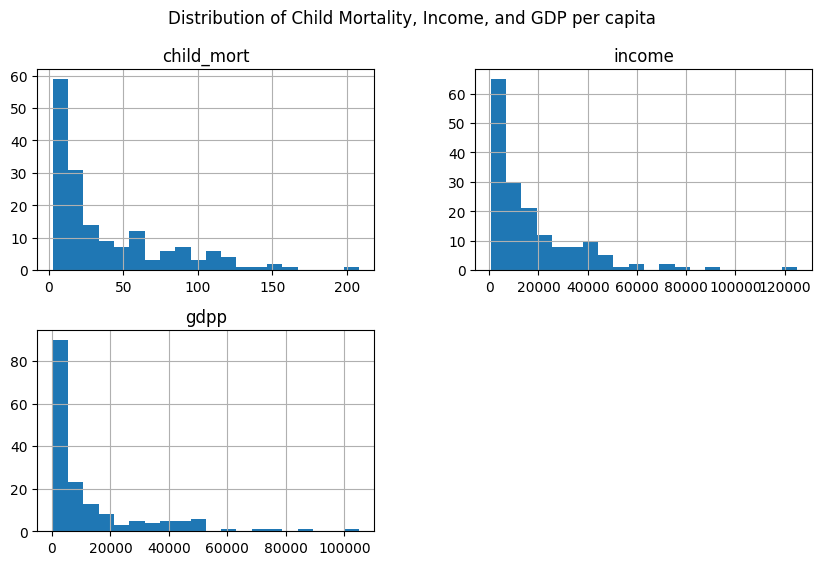

In [6]:
# Visualize the distribution of 'child_mort', 'income', and 'gdpp'
df[['child_mort', 'income', 'gdpp']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribution of Child Mortality, Income, and GDP per capita')
plt.show()

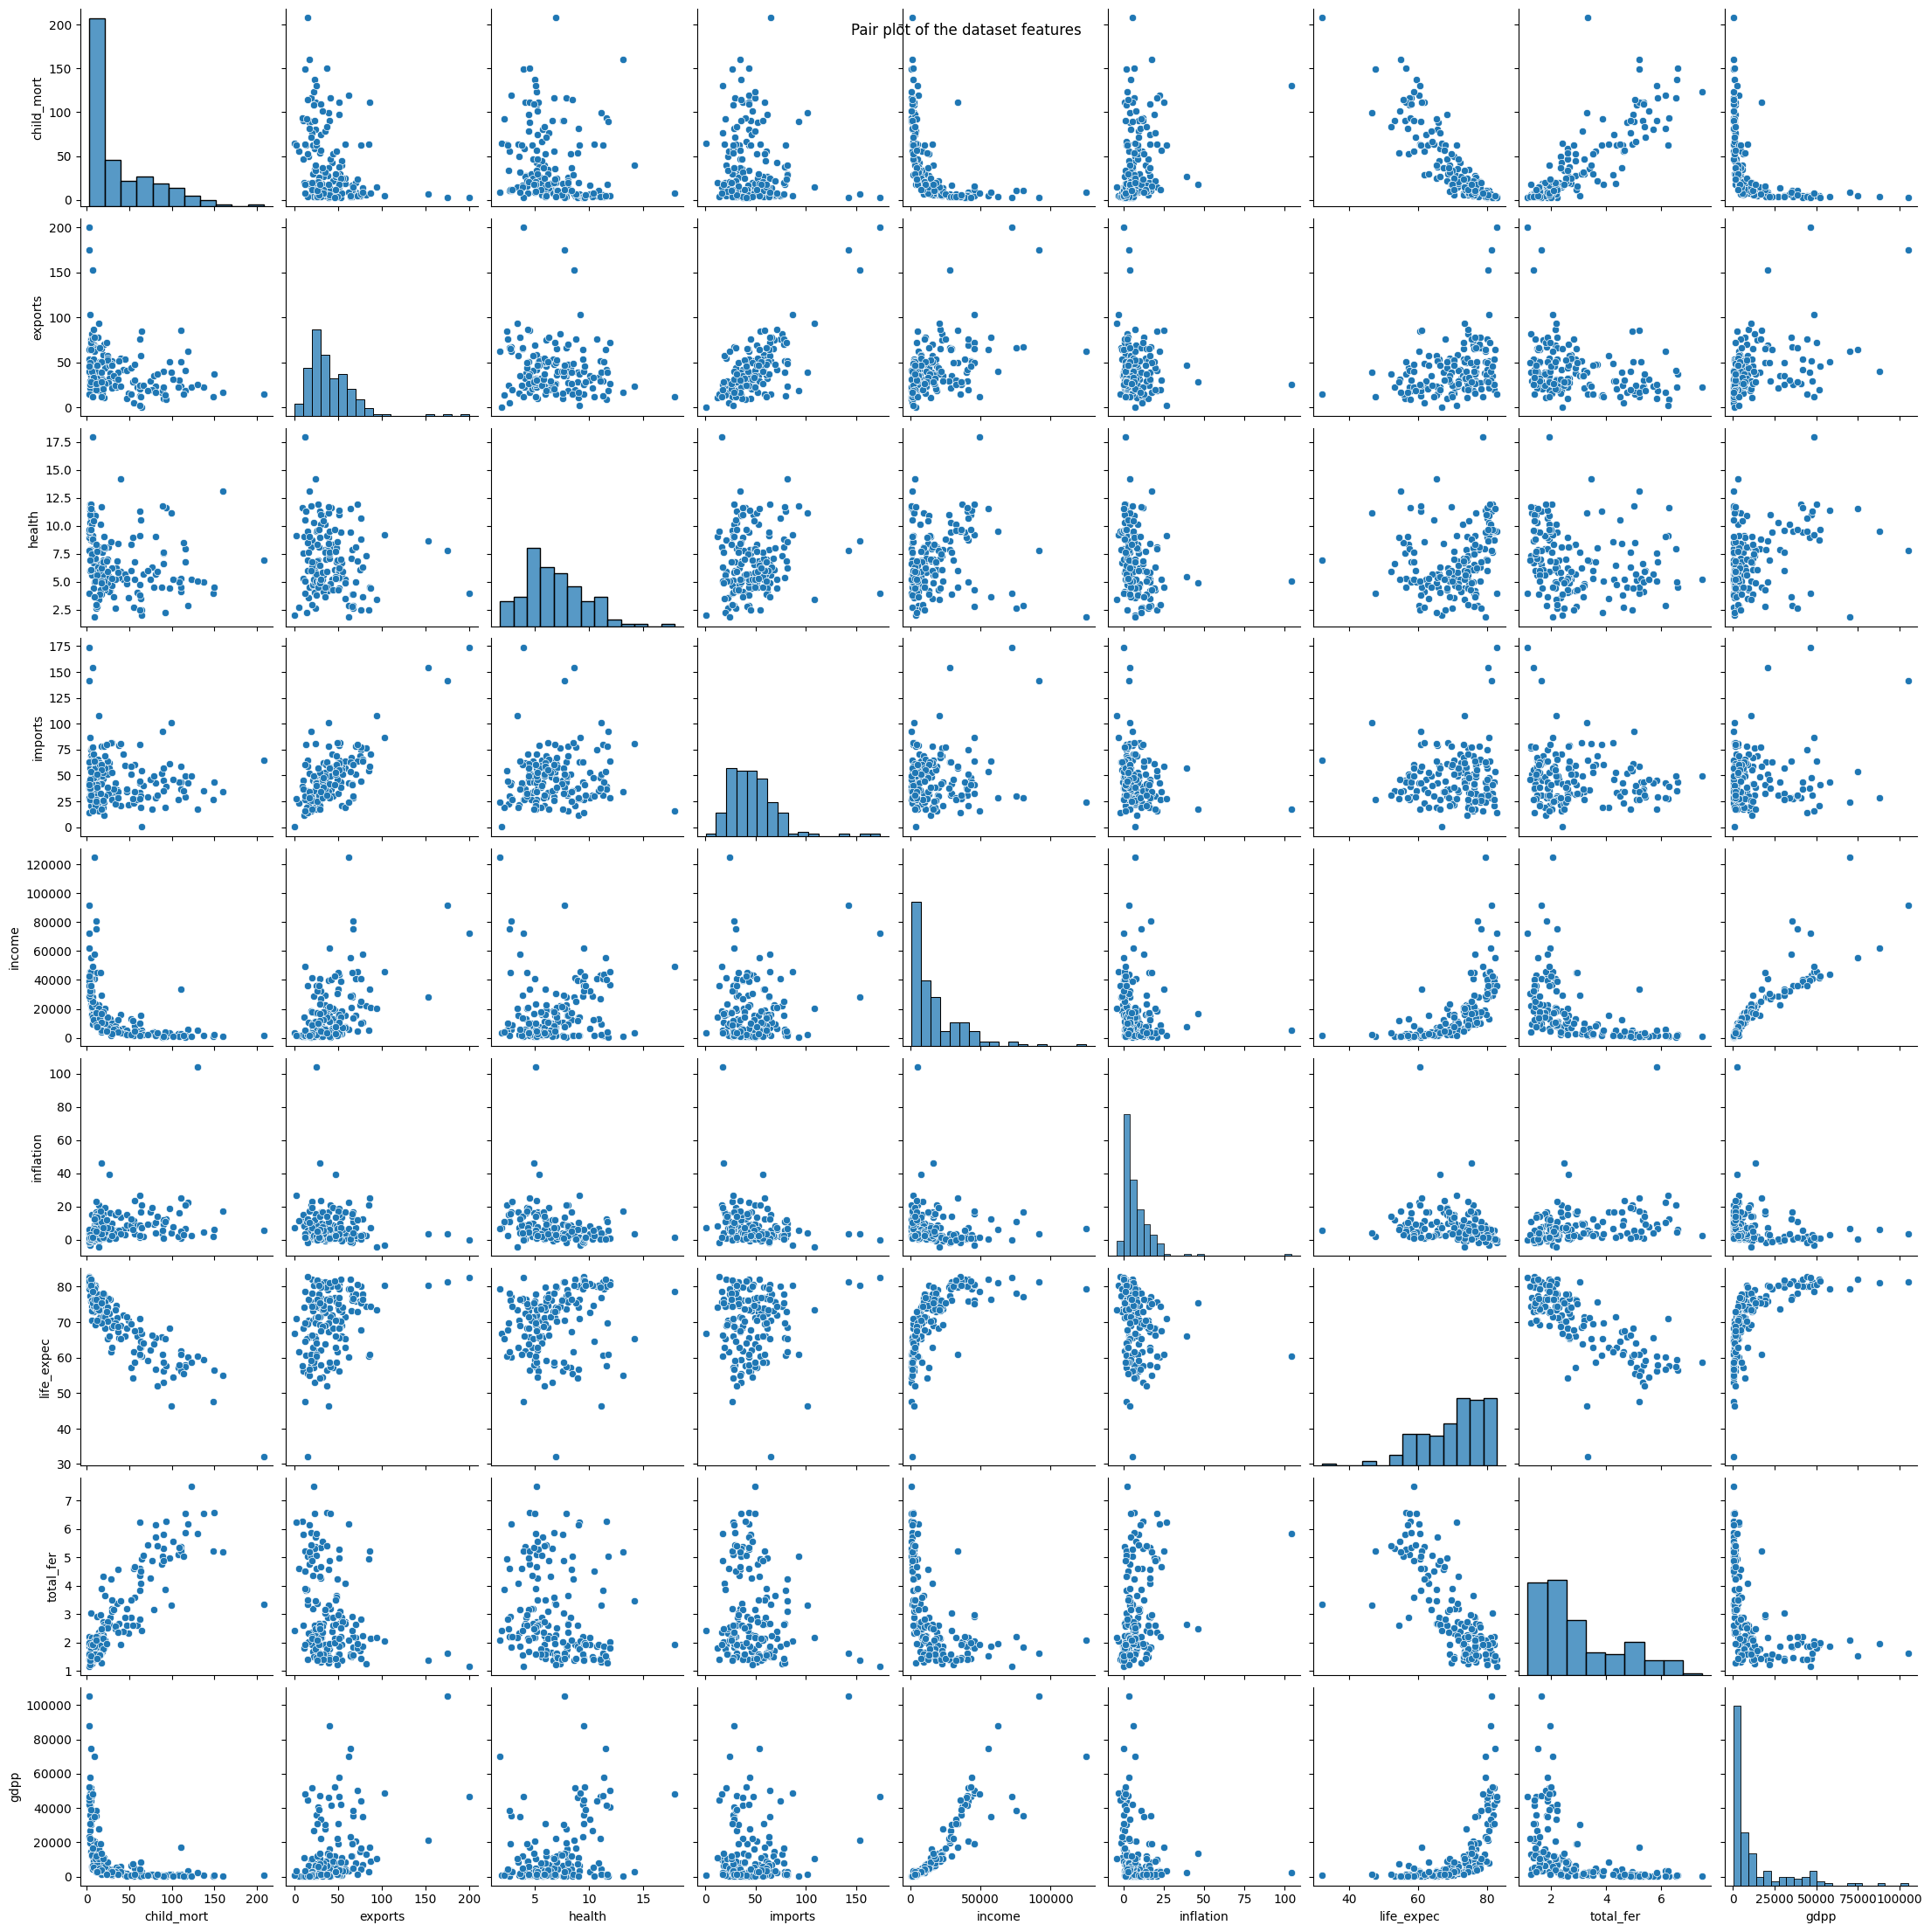

In [7]:
# Create pairplots to visualize relationships between features.
sns.pairplot(df)
plt.suptitle('Pair plot of the dataset features')
plt.show()

### Task 2: Initial K-means Clustering

1. Drop the `'country'` column since it's not a numerical feature and we can't use it for clustering. Perform this step in a new DataFrame called `'df_cluster1'`.
2. Use StandardScaler to standardize the numerical features in 'df_cluster1', ensuring they have a mean of 0 and a standard deviation of 1, bringing all features onto a common scale.
3. Apply K-Means clustering to the standardized data in 'df_cluster1' with an initial number of clusters (e.g., 4).
4. Print the inertia and centroids obtained from the KMeans model to understand the clustering performance.
5. Add the cluster labels to the original DataFrame 'df'.
6. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [8]:
# Drop the 'country' column since it's not a numerical feature
df_cluster1 = df.drop('country', axis=1)


# Standardize the numerical features
scaler = StandardScaler()
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_cluster1[features] = scaler.fit_transform(df_cluster1[features])


#check few rows
df_cluster1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [11]:
# Perform KMeans clustering withh n_clusters as 4
km = KMeans(n_clusters =  4 , n_init='auto')
km.fit_transform(df_cluster1)


# Fit the KMeans model to the data (df_cluster)
df_cluster1["cluster"] = km.labels_
df_cluster1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,3


In [12]:
#Print the inertia and centroids
#Print the inertia and centroids

#Inertia
print("Inertia", km.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km.cluster_centers_
print(centroids)


Inertia 758.8471025050721
**************************************************
Centroids
[[-0.28801972 -0.37168734 -0.52191086 -0.50445576 -0.26178088  0.25809867
   0.19673042 -0.264378   -0.38597324]
 [ 1.39052846 -0.44568534 -0.17203068 -0.18179731 -0.69679938  0.39266281
  -1.30182572  1.37139779 -0.60730886]
 [-0.83001863  0.49132022  0.8030784  -0.01064265  1.64385433 -0.47375735
   1.12419087 -0.76412317  1.85544027]
 [-0.58015507  0.52798236  0.18979249  0.73616765 -0.11270812 -0.36319105
   0.38436199 -0.63033721 -0.21786951]]


In [13]:
# Add the cluster labels to the original DataFrame 'df'.
df_cluster1.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,3


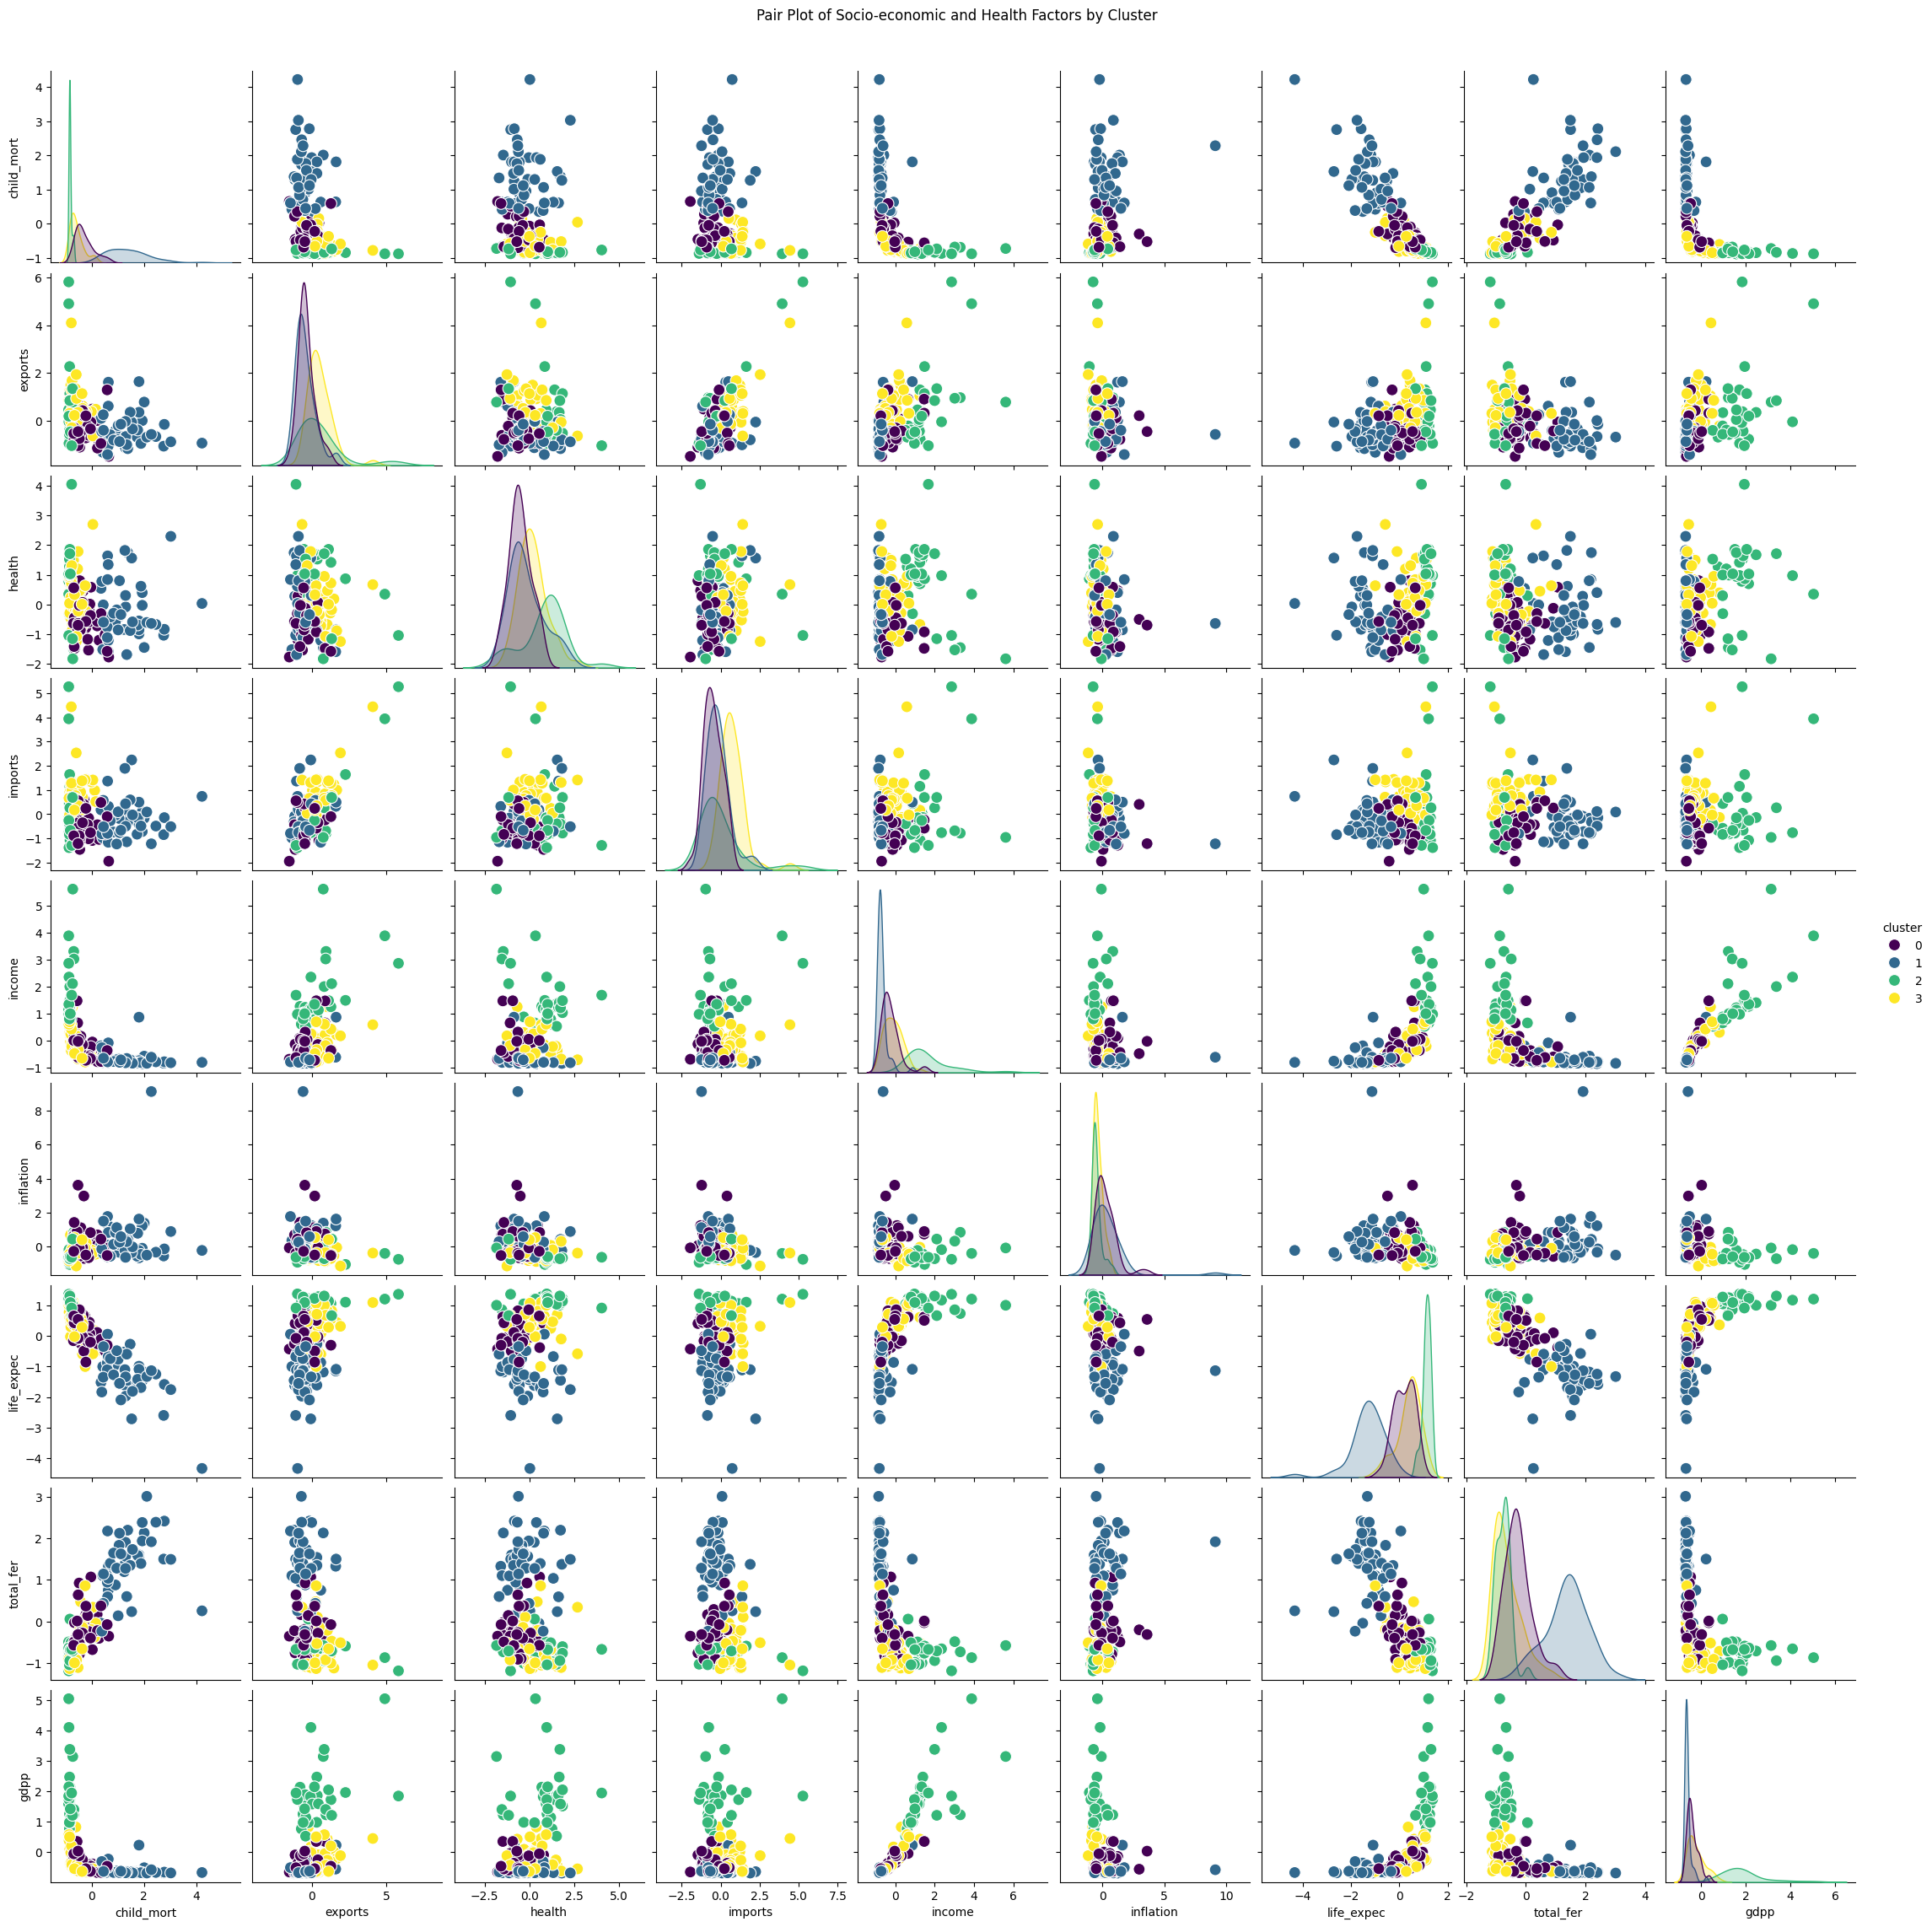

In [17]:
#Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.
import seaborn as sns

pair_plot = sns.pairplot(df_cluster1, hue='cluster', palette='viridis', diag_kind='kde', plot_kws={'s': 100})
pair_plot.fig.suptitle('Pair Plot of Socio-economic and Health Factors by Cluster', y=1.02)
plt.show()



### Task3: Elbow Method for Determining Optimal Clusters

- Use the Elbow Method to determine the optimal number of clusters. Check clusters ranging from 1 to 20.
- Plot the Elbow Method graph to visualize the optimal number of clusters.
- Train the KMeans model using the number of clusters identified by the Elbow Method.

[759.468471992558, 732.4436874336138, 645.9837371449739, 616.8907966931864, 473.69439559818954, 456.41995998334613, 433.0253894717253, 405.7878021305223, 384.5924505120829, 373.8962649756033, 365.124985461951]
365.124985461951


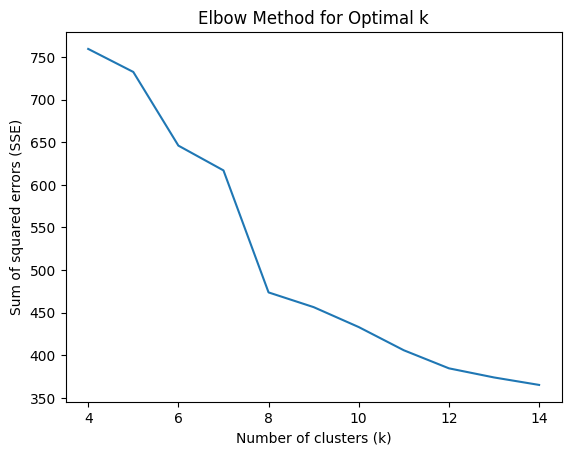

In [23]:
# Determine the optimal number of clusters using the Elbow Method

sse  = []

K_rng = range(4 , 15)

for k in K_rng:
    km = KMeans(n_clusters = k , n_init= "auto")
    km.fit(df_cluster1)
    sse.append(km.inertia_)

print(sse)
print(min(sse))

# Plot the Elbow Method graph
plt.plot(K_rng , sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [28]:
# Train the KMeans model using the number of clusters identified by the Elbow Method.
df = df.drop(columns = ["country"] , axis = 1)

km1  = KMeans(n_clusters  = 8 , n_init = "auto")
# Perform KMeans clustering withh optimal n_clusters


# Fit the KMeans model to the data (df_cluster)
km1.fit(df)
#assigning the cluster values



KeyError: "['country'] not found in axis"

In [30]:
Clusters = km1.labels_
df["Clusters"] = Clusters

df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,7
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,5


In [31]:
#Print the inertia and centroids

#Inertia
print("Inertia", km1.inertia_)

print('*' * 50)

#Centroids
print('Centroids')
centroids = km1.cluster_centers_
print(centroids)


Inertia 4474848133.2614975
**************************************************
Centroids
[[3.50000000e+00 9.29000000e+01 9.58333333e+00 7.46000000e+01
  6.98333333e+04 3.29566667e+00 8.15000000e+01 1.70000000e+00
  8.91333333e+04]
 [2.79717949e+01 3.87102564e+01 6.05487179e+00 4.68358974e+01
  9.22179487e+03 7.76900000e+00 7.14307692e+01 2.52307692e+00
  4.29076923e+03]
 [4.54705882e+00 4.51764706e+01 1.03482353e+01 4.15117647e+01
  4.20941176e+04 1.76235294e+00 8.05529412e+01 1.80058824e+00
  4.54588235e+04]
 [1.34058824e+01 5.72470588e+01 7.32235294e+00 5.21705882e+01
  3.19470588e+04 5.47005882e+00 7.73647059e+01 2.08588235e+00
  2.32176471e+04]
 [9.00000000e+00 6.23000000e+01 1.81000000e+00 2.38000000e+01
  1.25000000e+05 6.98000000e+00 7.95000000e+01 2.07000000e+00
  7.03000000e+04]
 [1.46700000e+01 4.61833333e+01 6.65733333e+00 4.54966667e+01
  1.78833333e+04 7.60326667e+00 7.43366667e+01 1.94533333e+00
  1.01926667e+04]
 [8.03333333e+00 1.11366667e+02 3.14333333e+00 7.74666667e+0

### Task 4: Hierarchical Clustering

1. Apply hierarchical clustering using Agglomerative Clustering with 6 clusters.
2. Use the following parameters: `metric='cosine', linkage='complete'`.
3. Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
4. Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points to ensure clarity.
5. Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

In [36]:
# Apply Agglomerative Clustering (6 clusters, metric='cosine', linkage='complete')

df  =pd.read_csv("country_data.csv")
df_H = df.drop(columns  = ["country"] , axis = 1)

from sklearn.cluster import AgglomerativeClustering

AggCluster  =AgglomerativeClustering(n_clusters=6 , metric='cosine',linkage = "ward")


#Assign cluster labels to the original DataFrame and print a sample of 10 rows to verify the cluster assignments.
AggCluster.fit(df_H)


In [43]:
dir(AggCluster)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__sklearn_tags__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_params_html',
 '_html_repr',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_params',
 'compute_distances',
 'compute_full_tree',
 'connectivity',
 'distance_threshold',
 'fit',
 'fit_predict',
 'get

In [42]:

h_cluster = AggCluster.labels_

df_H["Cluster"] = h_cluster

df_H.head()

AttributeError: 'AgglomerativeClustering' object has no attribute 'labels_'

In [ ]:
# Plot the dendrogram to visualize the hierarchical clustering process, using the first 50 data points



# Perform hierarchical/agglomerative clustering on subset
 

# Plotting the dendrogram for subset


In [ ]:
# Create a pair plot to visualize the relationships between all relevant features, colored by cluster labels.

